In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
del df['RowNumber'], df['CustomerId'], df['Surname']

In [4]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [5]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
df['Geography'] = df['Geography'].map({'France':2, 'Germany':1, 'Spain':0})

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [10]:
X = df.drop('Exited', axis=1).values
y = df['Exited'].values

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=1)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [14]:
df['Exited'].unique()

array([1, 0], dtype=int64)

In [15]:
features = X_train.shape[1]
targets = df['Exited'].nunique()
if targets == 2:
    targets = 1
features, targets

(10, 1)

In [16]:
model = Sequential()
model.add(Dense(features,activation='relu',input_shape=(features,)))
model.add(BatchNormalization())
model.add(Dense(5,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(targets,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 batch_normalization_1 (Batc  (None, 5)                20        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 231
Trainable params: 201
Non-trainable pa

In [18]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, batch_size=32,epochs=100, validation_data=[X_test, y_test])

Epoch 1/100
250/250 [==============================] - 0s 966us/step - loss: 0.3475 - accuracy: 0.8549 - val_loss: 0.3331 - val_accuracy: 0.8655
Epoch 2/100
250/250 [==============================] - 0s 882us/step - loss: 0.3473 - accuracy: 0.8556 - val_loss: 0.3309 - val_accuracy: 0.8640
Epoch 3/100
250/250 [==============================] - 0s 896us/step - loss: 0.3465 - accuracy: 0.8560 - val_loss: 0.3327 - val_accuracy: 0.8635
Epoch 4/100
250/250 [==============================] - 0s 916us/step - loss: 0.3464 - accuracy: 0.8566 - val_loss: 0.3325 - val_accuracy: 0.8625
Epoch 5/100
250/250 [==============================] - 0s 909us/step - loss: 0.3488 - accuracy: 0.8545 - val_loss: 0.3332 - val_accuracy: 0.8635
Epoch 6/100
250/250 [==============================] - 0s 910us/step - loss: 0.3467 - accuracy: 0.8579 - val_loss: 0.3332 - val_accuracy: 0.8640
Epoch 7/100
250/250 [==============================] - 0s 927us/step - loss: 0.3475 - accuracy: 0.8587 - val_loss: 0.3314 - val_ac

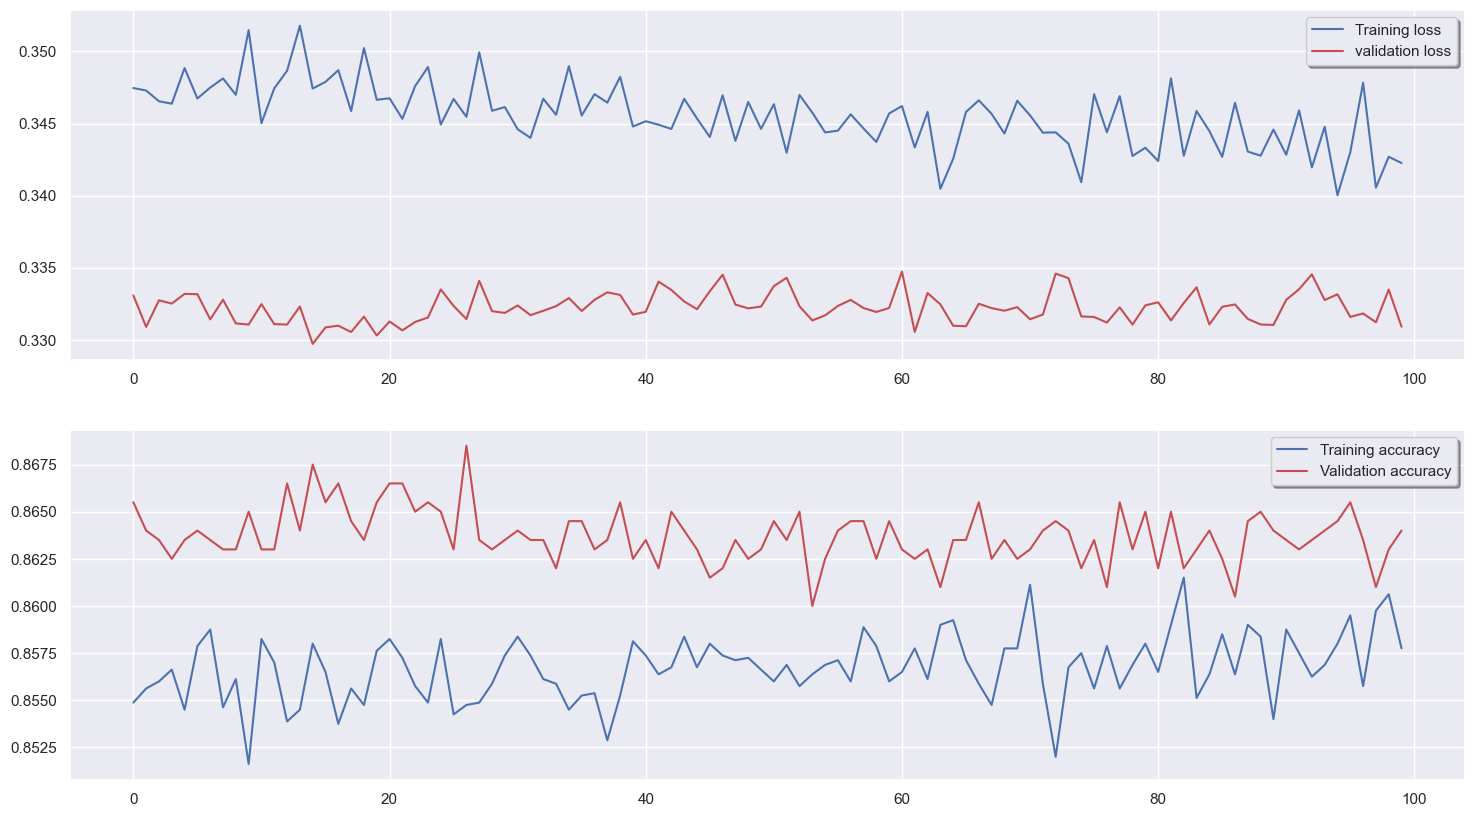

In [22]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [20]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 624us/step - loss: 0.3325 - accuracy: 0.8630


[0.3324751853942871, 0.8629999756813049]

In [26]:
# Changing hyperparameters to improve NN accuracy

In [24]:
model1 = Sequential()
model1.add(Dense(features,activation='relu',input_shape=(features,)))
model1.add(Dense(6,activation='relu'))
model1.add(Dense(targets,activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, batch_size=32,epochs=100, validation_data=[X_test, y_test])

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.6426 - accuracy: 0.6562 - val_loss: 0.4855 - val_accuracy: 0.7880
Epoch 2/100
250/250 [==============================] - 0s 820us/step - loss: 0.4580 - accuracy: 0.8012 - val_loss: 0.4456 - val_accuracy: 0.7980
Epoch 3/100
250/250 [==============================] - 0s 818us/step - loss: 0.4324 - accuracy: 0.8069 - val_loss: 0.4285 - val_accuracy: 0.8035
Epoch 4/100
250/250 [==============================] - 0s 824us/step - loss: 0.4153 - accuracy: 0.8158 - val_loss: 0.4122 - val_accuracy: 0.8145
Epoch 5/100
250/250 [==============================] - 0s 823us/step - loss: 0.3990 - accuracy: 0.8305 - val_loss: 0.3947 - val_accuracy: 0.8290
Epoch 6/100
250/250 [==============================] - 0s 831us/step - loss: 0.3830 - accuracy: 0.8413 - val_loss: 0.3771 - val_accuracy: 0.8470
Epoch 7/100
250/250 [==============================] - 0s 840us/step - loss: 0.3709 - accuracy: 0.8475 - val_loss: 0.3655 - val_accu

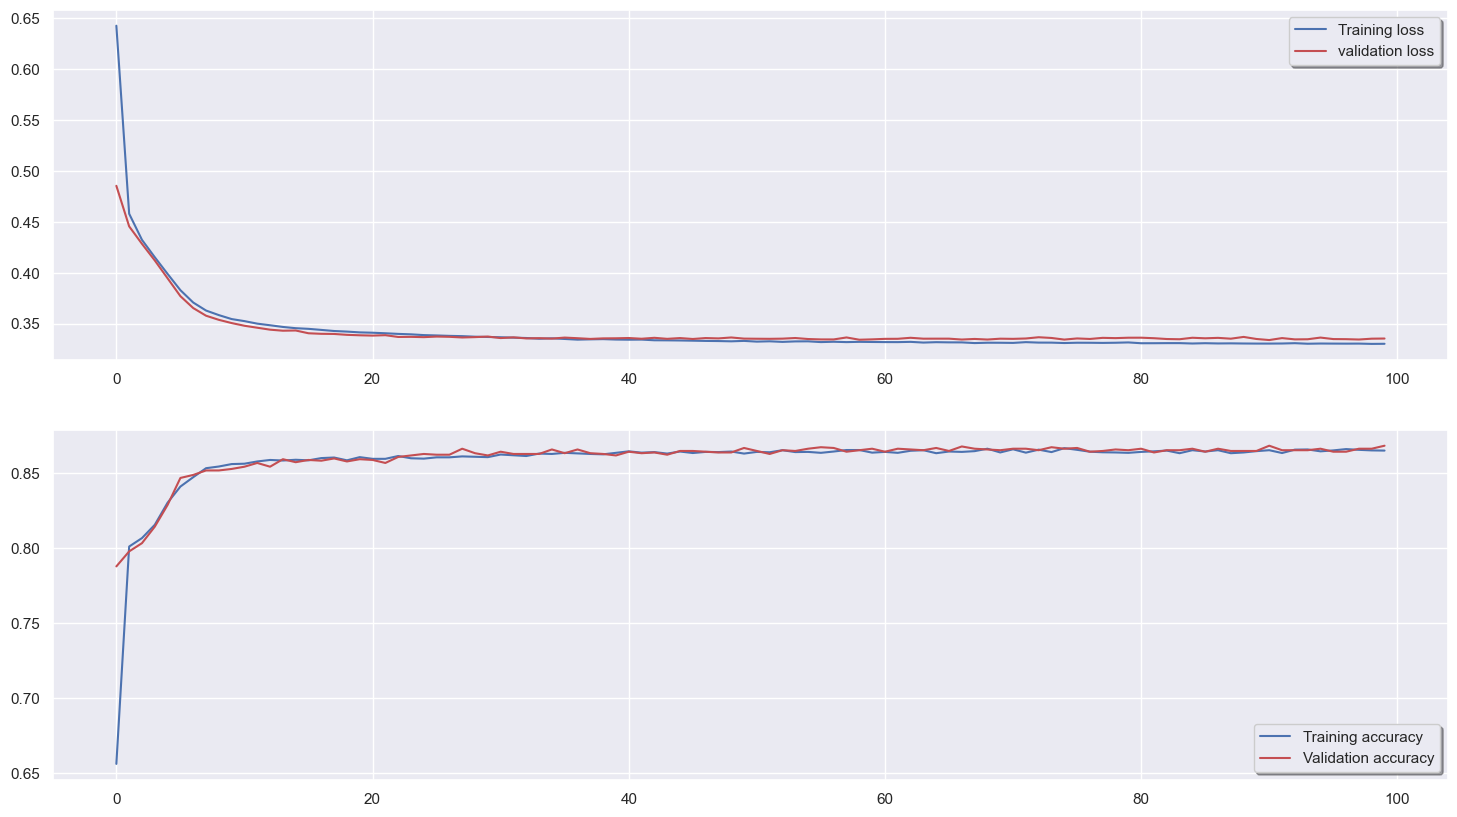

In [25]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history1.history['loss'], color='b', label="Training loss")
ax[0].plot(history1.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history1.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [27]:
model1.evaluate(X_test, y_test)

63/63 [==============================] - 0s 644us/step - loss: 0.3355 - accuracy: 0.8685


[0.3355294167995453, 0.8684999942779541]

In [28]:
model2 = Sequential()
model2.add(Dense(features,activation='relu',input_shape=(features,)))
model2.add(BatchNormalization())
model2.add(Dense(6,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(targets,activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, batch_size=32,epochs=100, validation_data=[X_test, y_test])

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.6997 - accuracy: 0.6008 - val_loss: 0.5572 - val_accuracy: 0.7740
Epoch 2/100
250/250 [==============================] - 0s 961us/step - loss: 0.4991 - accuracy: 0.8000 - val_loss: 0.4654 - val_accuracy: 0.8125
Epoch 3/100
250/250 [==============================] - 0s 979us/step - loss: 0.4519 - accuracy: 0.8140 - val_loss: 0.4360 - val_accuracy: 0.8205
Epoch 4/100
250/250 [==============================] - 0s 957us/step - loss: 0.4327 - accuracy: 0.8234 - val_loss: 0.4180 - val_accuracy: 0.8265
Epoch 5/100
250/250 [==============================] - 0s 946us/step - loss: 0.4165 - accuracy: 0.8295 - val_loss: 0.4012 - val_accuracy: 0.8365
Epoch 6/100
250/250 [==============================] - 0s 960us/step - loss: 0.4008 - accuracy: 0.8353 - val_loss: 0.3846 - val_accuracy: 0.8410
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3912 - accuracy: 0.8416 - val_loss: 0.3731 - val_accura

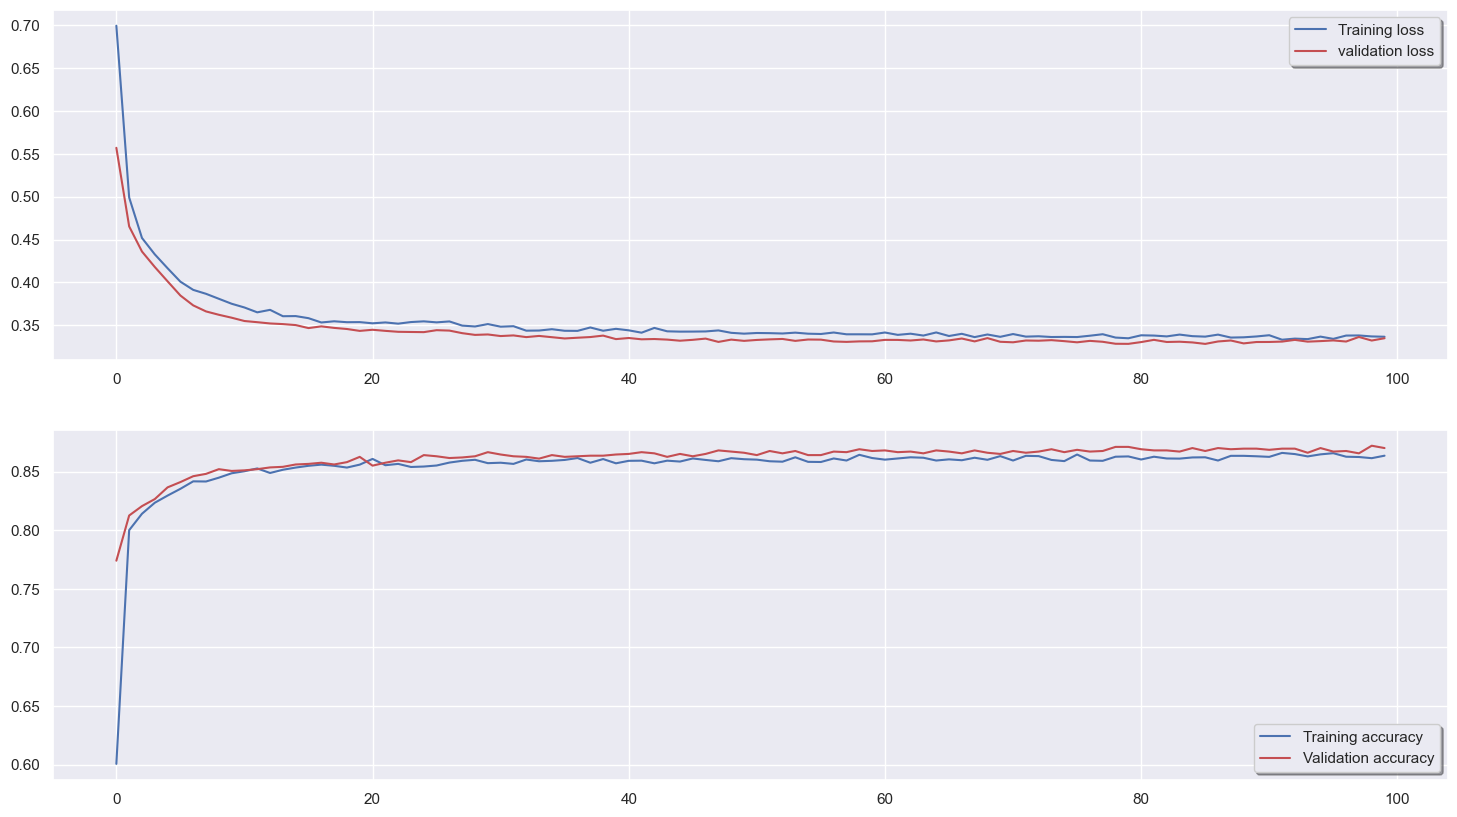

In [29]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history2.history['loss'], color='b', label="Training loss")
ax[0].plot(history2.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history2.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [30]:
model2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 631us/step - loss: 0.3348 - accuracy: 0.8700


[0.33476516604423523, 0.8700000047683716]

In [31]:
# Model2 is the best till now